import libaries

In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import scipy
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import string

# importing the libraries for cleaning the text
import re
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/Tweets.csv'
Sentiment_tweet = pd.read_csv(path)
Sentiment_tweet_copy = Sentiment_tweet.copy()

In [4]:
Sentiment_tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**About the Dataset**  
What does these columns in the dataset represents?

1.tweet_id - The id of the tweet by the customer        
2.airline_sentiment - Whether the airline sentiment is "neutral", "positive", or "negative". It's the sentiment of the airline itself and not the tweets.   
3."airline_sentiment_confidence" - Confidence score of the airline.    
4."negativereason" - Reason is given in the form of text data only for negative review tweets      
5."negativereason_confidence" - The confidence score of the reason for negative review tweets   
6."airline" - The name of the airline   
7."name" - Name of the person who tweeted   
8."retweet_count" - The number of the reposted or forwarded tweets by other users.   
9."text" - The tweet by the customer   
10."tweet_created" - The time and date when the tweet was created  
11."tweet_location" - The location from when the user posted the tweet
12."user_timezone" - The timezone from when the user posted the tweet

In [5]:
Sentiment_tweet.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [6]:
Sentiment_tweet['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [7]:
#information of columns of the dataset
Sentiment_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [8]:
Sentiment_tweet.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

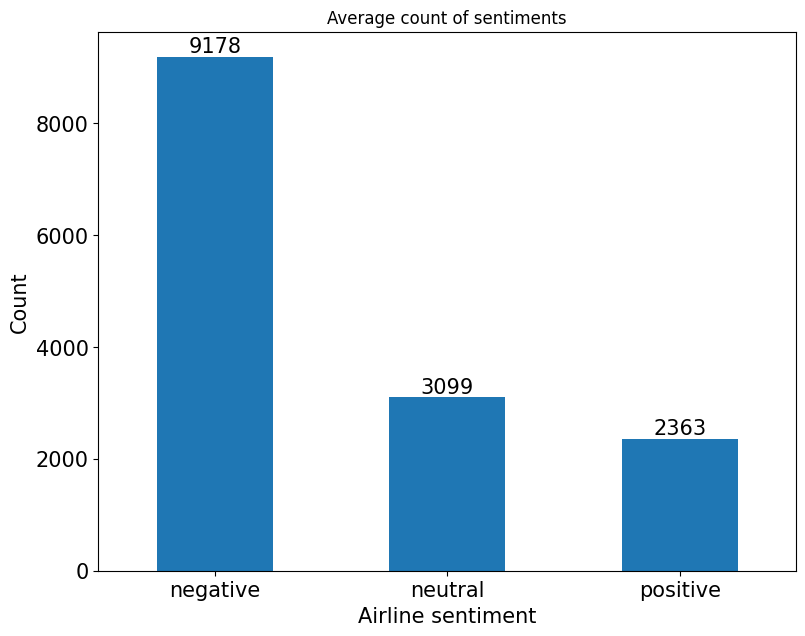

In [9]:
fig, ax = plt.subplots(figsize =(9,7))
plot = Sentiment_tweet.groupby('airline_sentiment')['airline_sentiment'].count().plot(kind = 'bar',fontsize=15,)
plt.xlabel('Airline sentiment',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Average count of sentiments',fontsize=12)
plt.xticks(rotation=0)
for value in plot.patches:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom',fontsize=15)

Analysis by the Reason for the Negative Reviews

In [10]:
round(Sentiment_tweet['negativereason'].value_counts(normalize=True)*100,2)

Customer Service Issue         31.71
Late Flight                    18.14
Can't Tell                     12.97
Cancelled Flight                9.23
Lost Luggage                    7.89
Bad Flight                      6.32
Flight Booking Problems         5.76
Flight Attendant Complaints     5.24
longlines                       1.94
Damaged Luggage                 0.81
Name: negativereason, dtype: float64

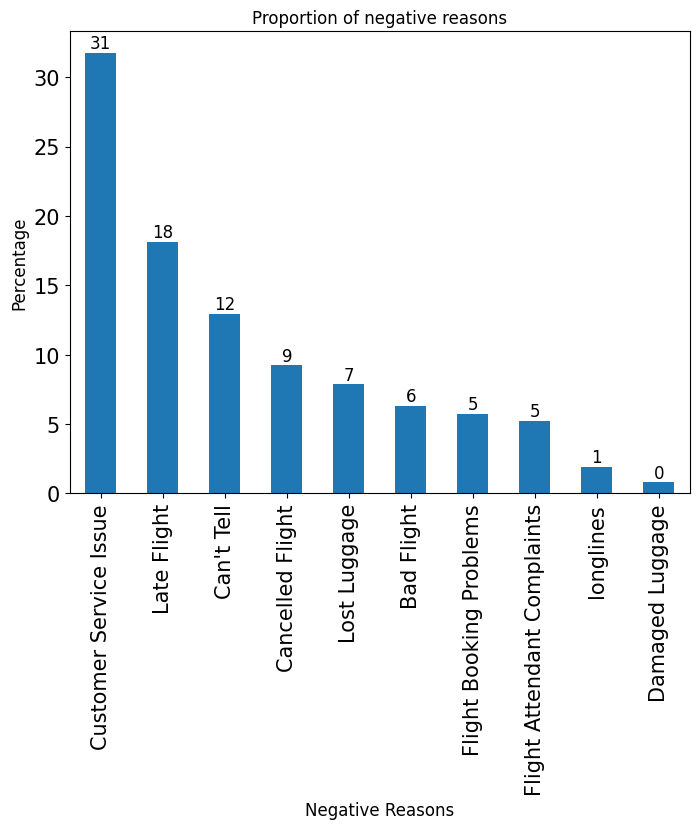

In [11]:
fig, ax = plt.subplots(figsize =(8,6))
plot = round(Sentiment_tweet['negativereason'].value_counts(normalize=True)*100,2).plot(kind = 'bar',fontsize=15,)
plt.xlabel('Negative Reasons',fontsize=12)
plt.ylabel('Percentage',fontsize=12)
plt.title('Proportion of negative reasons',fontsize=12)
for value in plot.patches:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom',fontsize=12)

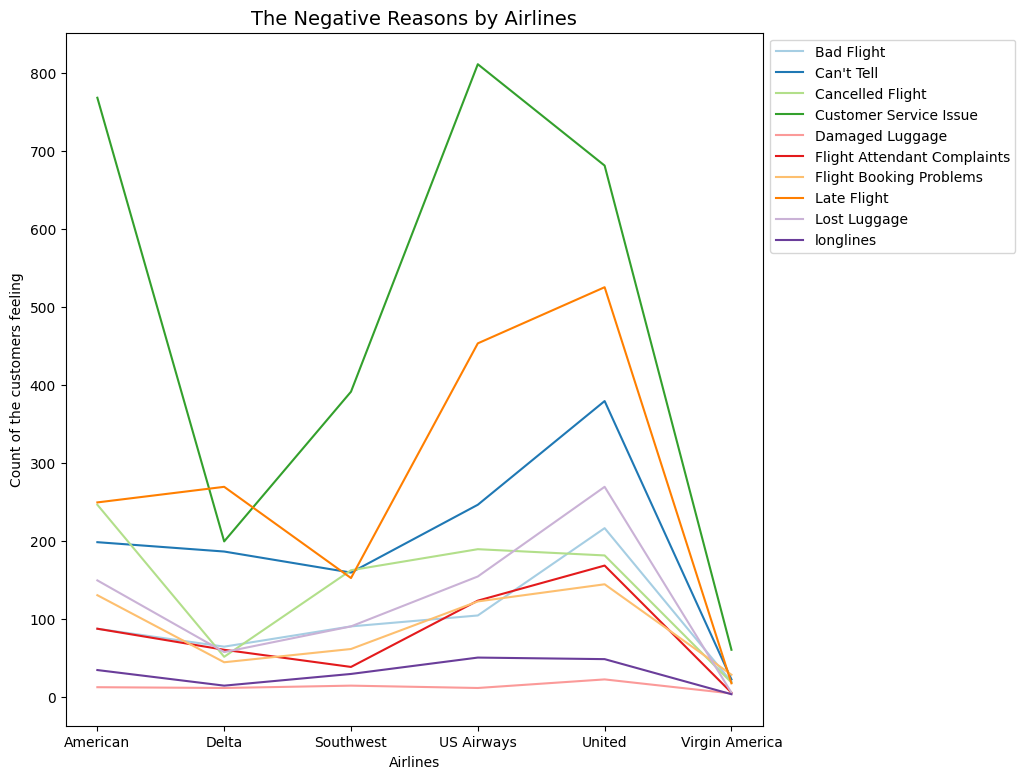

In [12]:
pd.crosstab(Sentiment_tweet.airline, Sentiment_tweet.negativereason).plot(color=sns.color_palette("Paired"),figsize=(9,9))
plt.title('The Negative Reasons by Airlines', fontsize=14)
plt.xlabel('Airlines')
plt.ylabel('Count of the customers feeling')
plt.legend(bbox_to_anchor=(1, 1), loc=2)

**Insights:**

1."customer service issue" has been major (Top most) problem for all the airlines except delta.

2.All the airlines negative reasons follow the same pattern as seen in the previous graph. Henceforth, the airlines needs to look into the major reason like "customer service issue", "late flight" to improve their standards

In [13]:

#airline names Count
len(Sentiment_tweet['airline'].unique())

6

In [14]:
#airline names
Sentiment_tweet['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [15]:

#group airline to count of the sentiment values
Sentiment_tweet.groupby(['airline','airline_sentiment'])['airline_sentiment'].count()

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: airline_sentiment, dtype: int64

In [16]:
#returns a airline and airline_sentiment which sentiment count is high 
Sentiment_tweet.groupby(['airline','airline_sentiment'])['airline_sentiment'].count().idxmax()

('United', 'negative')

In [17]:
Sentiment_tweet.groupby(['airline','airline_sentiment'])['airline'].count().max()

2633

In [18]:
#negativereason Valuecounts
round(Sentiment_tweet['negativereason'].value_counts(normalize=True)*100,2).max()

31.71

In [19]:
#split time and date in tweet created column because of some analysis
Sentiment_tweet['date'] = Sentiment_tweet['tweet_created'].apply(lambda x: x.split(' ')[0])
Sentiment_tweet['time'] = Sentiment_tweet['tweet_created'].apply(lambda x: x.split(' ')[1] + ' ' + x.split(' ')[2])

In [20]:
Sentiment_tweet.groupby(['date','airline_sentiment'])['airline_sentiment'].count()

date        airline_sentiment
2015-02-16  negative                3
            neutral                 1
2015-02-17  negative              838
            neutral               297
            positive              273
2015-02-18  negative              736
            neutral               335
            positive              273
2015-02-19  negative              751
            neutral               329
            positive              296
2015-02-20  negative              835
            neutral               383
            positive              282
2015-02-21  negative             1049
            neutral               278
            positive              230
2015-02-22  negative             2266
            neutral               463
            positive              350
2015-02-23  negative             1919
            neutral               676
            positive              433
2015-02-24  negative              781
            neutral               337
            positive

In [21]:

Sentiment_tweet.groupby(['airline','airline_sentiment'])['airline_sentiment'].count()

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: airline_sentiment, dtype: int64

### **Analysis by the Retweet count**
This analysis is performed because, there may be tweets which other people wouldn't have expressed but wants to express to some others review. This is considered an important aspect because all the retweets are again considered as a new tweet by a different individual

In [22]:
value_counts = Sentiment_tweet['retweet_count'].value_counts()
#First, removing all the rows which has a retweet count of 0, because it doesn't add any value.
to_remove = value_counts[value_counts.index == 0].index  
Sentiment_tweet = Sentiment_tweet[~Sentiment_tweet.retweet_count.isin(to_remove)]

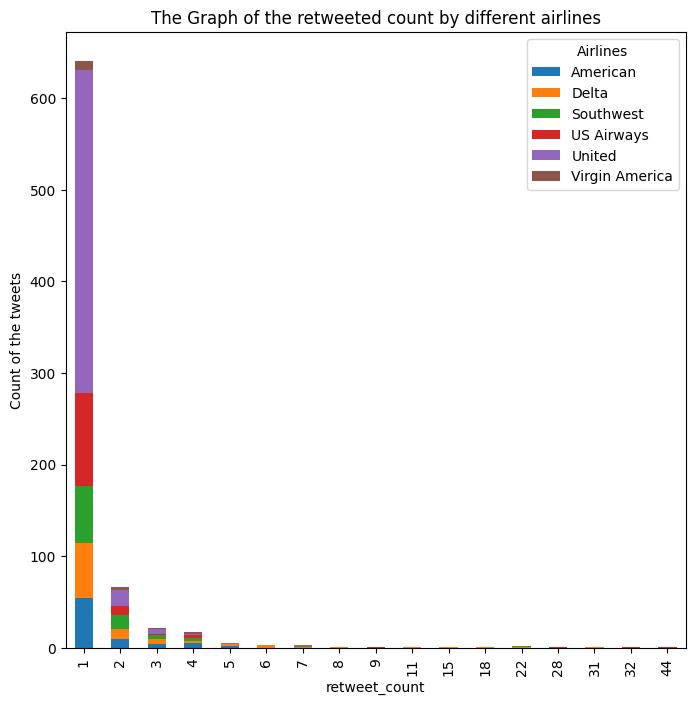

In [23]:
ct = pd.crosstab(Sentiment_tweet.retweet_count, Sentiment_tweet.airline)
ct.plot.bar(stacked=True, figsize = (8,8))
plt.ylabel("Count of the tweets")
plt.title("The Graph of the retweeted count by different airlines")
plt.legend(title='Airlines')
plt.show()

Analysis by the Reason for the Negative Reviews

In [24]:
Sentiment_tweet.corr()

<ipython-input-24-1636373fed93>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Sentiment_tweet.corr()


,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
tweet_id,1.000000,0.019149,0.007844,-0.016056
airline_sentiment_confidence,0.019149,1.000000,0.551251,-0.065889
negativereason_confidence,0.007844,0.551251,1.000000,-0.009504
retweet_count,-0.016056,-0.065889,-0.009504,1.000000


In [25]:

Sentiment_tweet['timestamp'] = pd.to_datetime(Sentiment_tweet['tweet_created'])

In [26]:
Sentiment_tweet['timestamp_dayofweek']=Sentiment_tweet['timestamp'].dt.weekday

In [27]:
Sentiment_tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,date,time,timestamp,timestamp_dayofweek
136,569625739231948800,positive,1.0,NaN,NaN,Virgin America,NaN,lisaptv,NaN,1,@virginamerica you ROCK for making it so I can...,NaN,2015-02-22 14:32:14 -0800,NaN,Mountain Time (US & Canada),2015-02-22,14:32:14 -0800,2015-02-22 14:32:14-08:00,6
147,569599867716132864,positive,1.0,NaN,NaN,Virgin America,NaN,jessicajaymes,NaN,2,Always have it together!!! You're welcome! RT ...,"[33.94652852, -118.40766257]",2015-02-22 12:49:25 -0800,"hollywood, california",Pacific Time (US & Canada),2015-02-22,12:49:25 -0800,2015-02-22 12:49:25-08:00,6
264,568929979981033472,positive,1.0,NaN,NaN,Virgin America,NaN,djchuang,NaN,1,@VirginAmerica thanks for gate checking my bag...,"[32.8454782, -96.8504585]",2015-02-20 16:27:32 -0800,"Orange County, CA",Pacific Time (US & Canada),2015-02-20,16:27:32 -0800,2015-02-20 16:27:32-08:00,4
304,568812046747201537,negative,1.0,Lost Luggage,1.0,Virgin America,NaN,snellbell,NaN,1,@VirginAmerica lost my luggage 4 days ago on f...,NaN,2015-02-20 08:38:54 -0800,NaN,Quito,2015-02-20,08:38:54 -0800,2015-02-20 08:38:54-08:00,4
318,568735060104511488,neutral,1.0,NaN,NaN,Virgin America,NaN,gemmabow19,NaN,2,@VirginAmerica can u help this 👸 @FreyaBevan_F...,NaN,2015-02-20 03:32:59 -0800,NaN,NaN,2015-02-20,03:32:59 -0800,2015-02-20 03:32:59-08:00,4


In [28]:
#extract the hour and minute in time column
import datetime
def extract_hour_minute(time_str):
    time_parts = time_str.split(' ')
    time = time_parts[0]
    dt = datetime.datetime.strptime(time, "%H:%M:%S")
    hour = dt.hour
    minute = dt.minute
    return f"{hour:02d}:{minute:02d}"

# apply function to 'time' column and create new 'hour_minute' column
Sentiment_tweet['time'] = Sentiment_tweet['time'].apply(extract_hour_minute)

In [29]:
Sentiment_tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,date,time,timestamp,timestamp_dayofweek
136,569625739231948800,positive,1.0,NaN,NaN,Virgin America,NaN,lisaptv,NaN,1,@virginamerica you ROCK for making it so I can...,NaN,2015-02-22 14:32:14 -0800,NaN,Mountain Time (US & Canada),2015-02-22,14:32,2015-02-22 14:32:14-08:00,6
147,569599867716132864,positive,1.0,NaN,NaN,Virgin America,NaN,jessicajaymes,NaN,2,Always have it together!!! You're welcome! RT ...,"[33.94652852, -118.40766257]",2015-02-22 12:49:25 -0800,"hollywood, california",Pacific Time (US & Canada),2015-02-22,12:49,2015-02-22 12:49:25-08:00,6
264,568929979981033472,positive,1.0,NaN,NaN,Virgin America,NaN,djchuang,NaN,1,@VirginAmerica thanks for gate checking my bag...,"[32.8454782, -96.8504585]",2015-02-20 16:27:32 -0800,"Orange County, CA",Pacific Time (US & Canada),2015-02-20,16:27,2015-02-20 16:27:32-08:00,4
304,568812046747201537,negative,1.0,Lost Luggage,1.0,Virgin America,NaN,snellbell,NaN,1,@VirginAmerica lost my luggage 4 days ago on f...,NaN,2015-02-20 08:38:54 -0800,NaN,Quito,2015-02-20,08:38,2015-02-20 08:38:54-08:00,4
318,568735060104511488,neutral,1.0,NaN,NaN,Virgin America,NaN,gemmabow19,NaN,2,@VirginAmerica can u help this 👸 @FreyaBevan_F...,NaN,2015-02-20 03:32:59 -0800,NaN,NaN,2015-02-20,03:32,2015-02-20 03:32:59-08:00,4


In [30]:
#converts timestamp strings to numeric values, and then groups them into discrete bins representing the hour of the day.
Sentiment_tweet['time'] = pd.to_numeric(Sentiment_tweet['time'].str.split(':').str[0])
Sentiment_tweet['time'] = pd.cut(Sentiment_tweet['time'], bins=range(0, 25), include_lowest=True, labels=range(0, 24))

In [31]:
Sentiment_tweet.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone', 'date', 'time', 'timestamp',
       'timestamp_dayofweek'],
      dtype='object')

In [32]:
#drop unimportant columns
Sentiment_tweet.drop(['tweet_id','airline_sentiment_gold','name','negativereason_gold','text','tweet_coord',
         'tweet_created','tweet_location','timestamp','date'],axis=1,inplace=True)

In [33]:
#label encoder in airline Sentiment
Sentiment_tweet['airline_sentiment'] = Sentiment_tweet['airline_sentiment'].replace({'positive':1,'neutral':2,'negative':3})

In [34]:
#fill the null values 
Sentiment_tweet['negativereason'].fillna('None',inplace=True)

In [35]:
le =LabelEncoder()

In [36]:
#label encoder in negativereason
Sentiment_tweet['negativereason'] = le.fit_transform(Sentiment_tweet['negativereason'])

In [37]:
Sentiment_tweet.groupby(['airline_sentiment'])['negativereason_confidence'].sum()

airline_sentiment
1      0.0000
2      0.0000
3    441.9927
Name: negativereason_confidence, dtype: float64

In [38]:
#fill empty cell in negativereason_confidence
Sentiment_tweet['negativereason_confidence'].fillna('0.0000',inplace=True)

In [39]:
#label encoder in airline
Sentiment_tweet['airline'] = le.fit_transform(Sentiment_tweet['airline'])

In [40]:
#label encoder in user_timezone
Sentiment_tweet['user_timezone'] = le.fit_transform(Sentiment_tweet['user_timezone'])

In [41]:

Sentiment_tweet.columns

Index(['airline_sentiment', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'retweet_count',
       'user_timezone', 'time', 'timestamp_dayofweek'],
      dtype='object')

In [42]:
Sentiment_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 136 to 14619
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   airline_sentiment             767 non-null    int64   
 1   airline_sentiment_confidence  767 non-null    float64 
 2   negativereason                767 non-null    int64   
 3   negativereason_confidence     767 non-null    object  
 4   airline                       767 non-null    int64   
 5   retweet_count                 767 non-null    int64   
 6   user_timezone                 767 non-null    int64   
 7   time                          767 non-null    category
 8   timestamp_dayofweek           767 non-null    int64   
dtypes: category(1), float64(1), int64(6), object(1)
memory usage: 54.8+ KB


In [43]:
Sentiment_tweet['negativereason_confidence']=pd.to_numeric(Sentiment_tweet['negativereason_confidence'])

In [44]:
Sentiment_tweet['time']=pd.to_numeric(Sentiment_tweet['time'])

<Axes: >

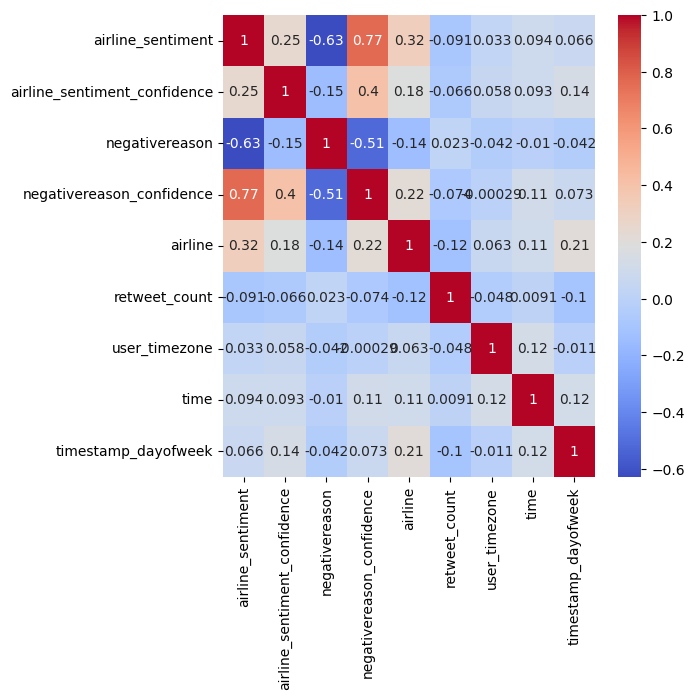

In [45]:
corr = Sentiment_tweet.corr()
plt.subplots(figsize = (6,6),)
sns.heatmap(corr,annot=True, cmap='coolwarm')

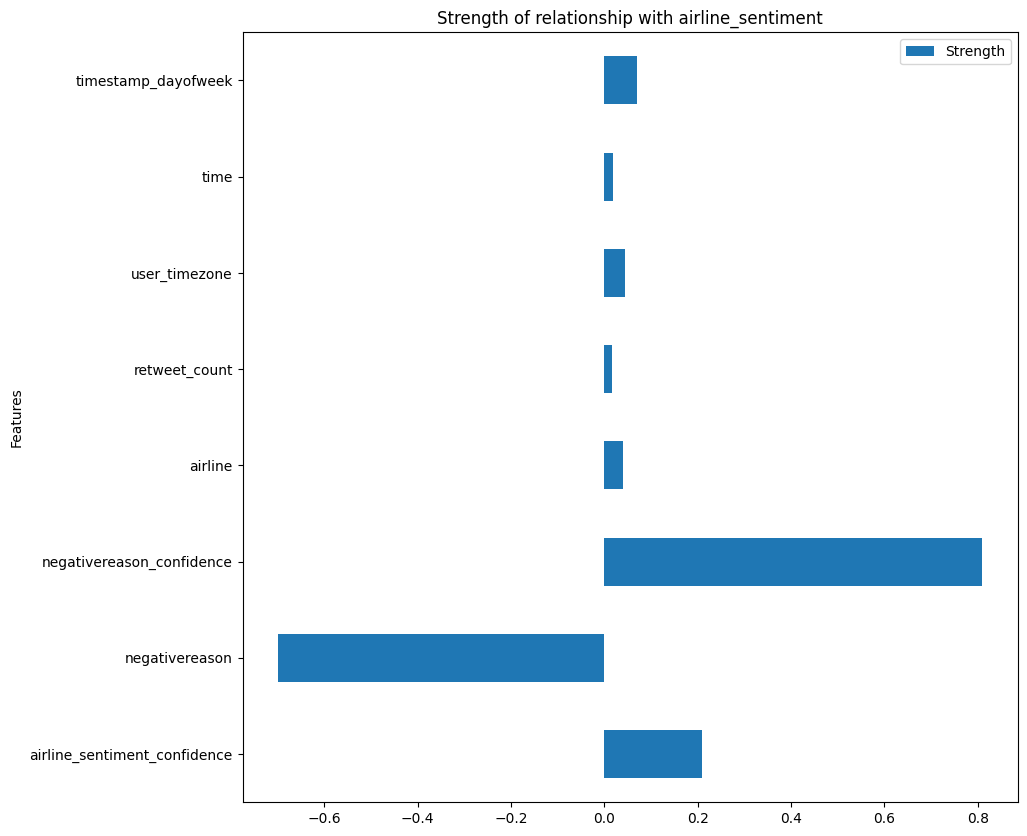

In [46]:
rel = {"Features": ['airline_sentiment_confidence', 'negativereason','negativereason_confidence',
                    'airline','retweet_count','user_timezone', 'time', 'timestamp_dayofweek'],
       "Strength":[0.21,-0.7,0.81,0.04,0.016,0.045,0.019,0.07]}
dataFrame  = pd.DataFrame(data = rel)
dataFrame.plot.barh(x='Features', y='Strength', title="Strength of relationship with airline_sentiment",figsize = (10,10))
plt.show(block=True)

**Important columns:**
1. airline_sentiment
2. negativereason
3. text

### Text Processing

In [47]:
Sentiment_tweet_copy = Sentiment_tweet_copy[['text','airline_sentiment']]

In [48]:
Sentiment_tweet_copy

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
...,...,...
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative
14637,@AmericanAir Please bring American Airlines to...,neutral
14638,"@AmericanAir you have my money, you change my ...",negative


In [58]:
from nltk.tokenize import TweetTokenizer
import string
nltk.download('wordnet')
#remove emojis
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
Sentiment_tweet_copy['text'] = Sentiment_tweet_copy['text'].apply(lambda x: remove_emoji(x))

#remove url,user_mention,hashtags
Sentiment_tweet_copy['text'] = Sentiment_tweet_copy['text'].apply(lambda x: re.sub(r'http\S+', '', x))  # remove URLs
Sentiment_tweet_copy['text'] = Sentiment_tweet_copy['text'].apply(lambda x: re.sub(r'@\w+', '', x))  # remove user mentions
Sentiment_tweet_copy['text'] = Sentiment_tweet_copy['text'].apply(lambda x: re.sub(r'#\w+', '', x))  # remove hashtags

# remove punctuation and convert to lowercase
Sentiment_tweet_copy['text'] = Sentiment_tweet_copy['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))  # remove punctuation
Sentiment_tweet_copy['text'] = Sentiment_tweet_copy['text'].str.lower()  # convert to lowercase

# tokenize text using NLTK TweetTokenizer
tokenizer = TweetTokenizer()
Sentiment_tweet_copy['tokens'] = Sentiment_tweet_copy['text'].apply(tokenizer.tokenize)

# remove stop words
stop_words = set(stopwords.words('english'))
Sentiment_tweet_copy['tokens'] = Sentiment_tweet_copy['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# lemmatize tokens using NLTK WordNetLemmatizer
wnl = nltk.WordNetLemmatizer()
Sentiment_tweet_copy['tokens'] = Sentiment_tweet_copy['tokens'].apply(lambda x: [wnl.lemmatize(word) for word in x])

# join tokens back into text
Sentiment_tweet_copy['text'] = Sentiment_tweet_copy['tokens'].apply(lambda x: ' '.join(x))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [59]:
Sentiment_tweet_copy['text'][0]

'said'

In [60]:
Sentiment_tweet_copy

,text,airline_sentiment,tokens
0,said,neutral,[said]
1,plus youve added commercial experience tacky,positive,"[plus, youve, added, commercial, experience, t..."
2,didnt today must mean need take another trip,neutral,"[didnt, today, must, mean, need, take, another..."
3,really aggressive blast obnoxious entertainmen...,negative,"[really, aggressive, blast, obnoxious, enterta..."
4,really big bad thing,negative,"[really, big, bad, thing]"
...,...,...,...
14635,thank got different flight chicago,positive,"[thank, got, different, flight, chicago]"
14636,leaving 20 minute late flight warning communic...,negative,"[leaving, 20, minute, late, flight, warning, c..."
14637,please bring american airline,neutral,"[please, bring, american, airline]"
14638,money change flight dont answer phone suggesti...,negative,"[money, change, flight, dont, answer, phone, s..."


In [61]:
Processed_Sentiment_data = Sentiment_tweet_copy[['text','airline_sentiment']]

In [62]:
#seprate the tweets positive negative neutral
positive_tweets = Processed_Sentiment_data[Processed_Sentiment_data["airline_sentiment"] == "positive"]
negative_tweets = Processed_Sentiment_data[Processed_Sentiment_data["airline_sentiment"] == "negative"]
neutral_tweets = Processed_Sentiment_data[Processed_Sentiment_data["airline_sentiment"] == "neutral"]

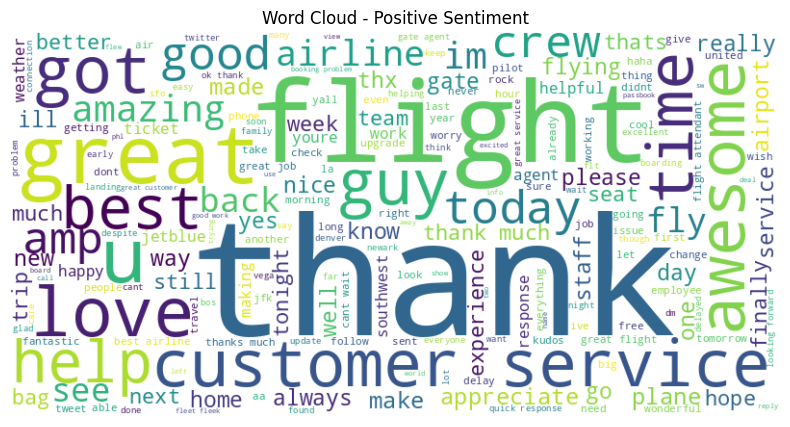

In [63]:
#plot the positive text in word cloud
positive_text = " ".join(positive_tweets["text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Positive Sentiment")
plt.show()

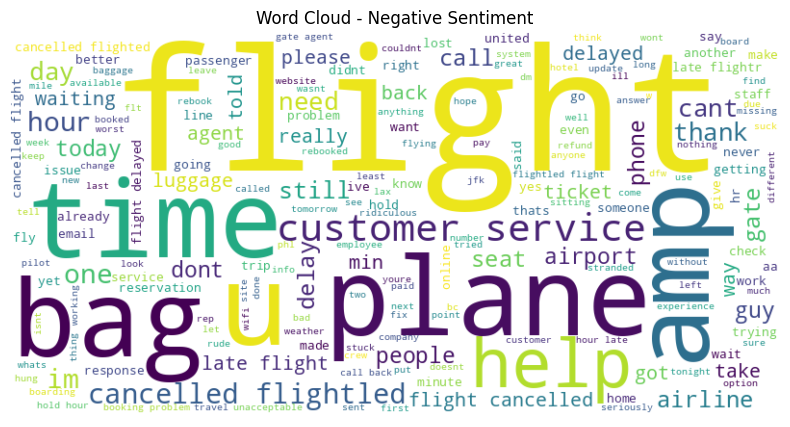

In [64]:
#plot the negative text in word cloud
negative_text = " ".join(negative_tweets["text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Negative Sentiment")
plt.show()

In [65]:
Processed_Sentiment_data

,text,airline_sentiment
0,said,neutral
1,plus youve added commercial experience tacky,positive
2,didnt today must mean need take another trip,neutral
3,really aggressive blast obnoxious entertainmen...,negative
4,really big bad thing,negative
...,...,...
14635,thank got different flight chicago,positive
14636,leaving 20 minute late flight warning communic...,negative
14637,please bring american airline,neutral
14638,money change flight dont answer phone suggesti...,negative


In [66]:
# saving the dataframe
Processed_Sentiment_data.to_csv('preprocessed_airline_data.csv')

In [67]:
pd.read_csv('/content/preprocessed_airline_data.csv')

,Unnamed: 0,text,airline_sentiment
0,0,said,neutral
1,1,plus youve added commercial experience tacky,positive
2,2,didnt today must mean need take another trip,neutral
3,3,really aggressive blast obnoxious entertainmen...,negative
4,4,really big bad thing,negative
...,...,...,...
14635,14635,thank got different flight chicago,positive
14636,14636,leaving 20 minute late flight warning communic...,negative
14637,14637,please bring american airline,neutral
14638,14638,money change flight dont answer phone suggesti...,negative
